In [33]:
import json
import itertools
import requests

import pandas as pd
import numpy as np
import networkx as nx
import pyvis.network as pn
import regex as re
import nltk

import matplotlib.pyplot as plt

from collections import Counter
from zipfile import ZipFile
from io import BytesIO

# Game of Thrones Characters

The data is taken from [here](https://github.com/mathbeveridge/asoiaf/)

In [3]:
got = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-all-edges.csv')
got.rename(columns={'Source':'source', 'Target':'target'},inplace=True)
got

source            target        Type    id  weight
0                   Addam-Marbrand     Brynden-Tully  Undirected     0       3
1                   Addam-Marbrand  Cersei-Lannister  Undirected     1       3
2                   Addam-Marbrand       Gyles-Rosby  Undirected     2       3
3                   Addam-Marbrand   Jaime-Lannister  Undirected     3      14
4                   Addam-Marbrand      Jalabhar-Xho  Undirected     4       3
...                            ...               ...         ...   ...     ...
2818  Walder-Frey-(son-of-Merrett)          Wex-Pyke  Undirected  2818       4
2819                  Waymar-Royce   Will-(prologue)  Undirected  2819      18
2820                        Weasel             Weese  Undirected  2820       6
2821                          Woth             Yoren  Undirected  2821       4
2822                        Yandry            Ysilla  Undirected  2822      14

[2823 rows x 5 columns]

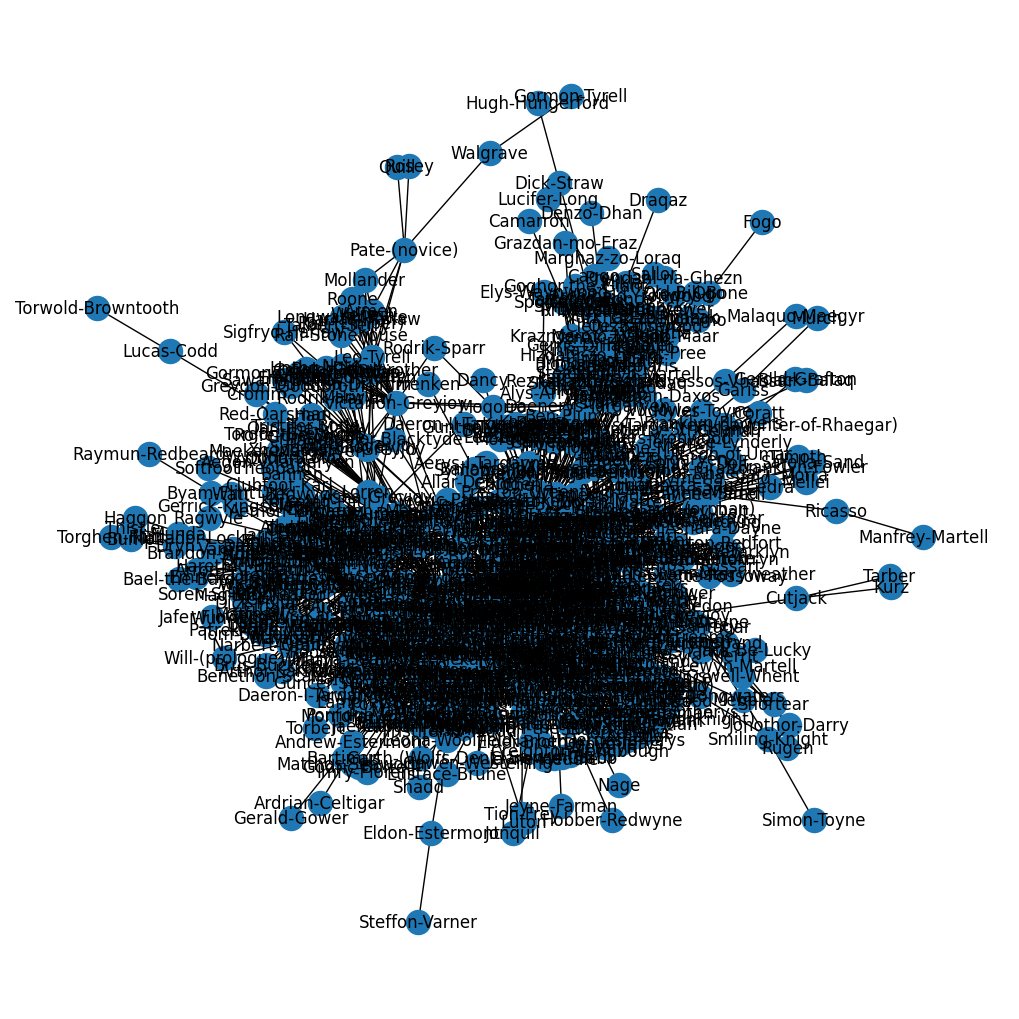

In [6]:
G = nx.from_pandas_edgelist(got[['source','target','weight']])
plt.figure(figsize=(10,10))
nx.draw_spring(G,with_labels=True)

In [11]:
[k for k,v in nx.centrality.degree_centrality(G).items() if v>0.12]

['Cersei-Lannister', 'Jaime-Lannister', 'Tyrion-Lannister', 'Jon-Snow']

In [15]:
[k for k,v in nx.pagerank(G).items() if v>0.01]

['Cersei-Lannister',
 'Jaime-Lannister',
 'Tyrion-Lannister',
 'Catelyn-Stark',
 'Robb-Stark',
 'Daenerys-Targaryen',
 'Eddard-Stark',
 'Stannis-Baratheon',
 'Jon-Snow',
 'Arya-Stark',
 'Theon-Greyjoy',
 'Sansa-Stark']

In [7]:
H = pn.Network(notebook=True)
H.from_nx(G)
H.show('got.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# Star Wars Characters

The data is taken from [here](https://zenodo.org/record/1411479)

In [16]:
with requests.get('https://zenodo.org/record/1411479/files/evelinag/star-wars-network-data-1.0.1.zip') as url:
    zf = ZipFile(BytesIO(url.content))
    raw = json.loads(zf.open('evelinag-star-wars-network-data-04538e0/starwars-full-interactions-allCharacters-merged.json').read().decode('latin-1'))

In [18]:
raw['nodes']

[{'name': 'DARTH VADER', 'value': 190, 'colour': '#000000'},
 {'name': 'R2-D2', 'value': 171, 'colour': '#bde0f6'},
 {'name': 'CHEWBACCA', 'value': 145, 'colour': '#A0522D'},
 {'name': 'BB-8', 'value': 40, 'colour': '#eb5d00'},
 {'name': 'QUI-GON', 'value': 62, 'colour': '#4f4fb1'},
 {'name': 'NUTE GUNRAY', 'value': 25, 'colour': '#808080'},
 {'name': 'PK-4', 'value': 4, 'colour': '#808080'},
 {'name': 'TC-14', 'value': 5, 'colour': '#808080'},
 {'name': 'OBI-WAN', 'value': 148, 'colour': '#48D1CC'},
 {'name': 'DOFINE', 'value': 4, 'colour': '#808080'},
 {'name': 'RUNE', 'value': 11, 'colour': '#808080'},
 {'name': 'TEY HOW', 'value': 5, 'colour': '#808080'},
 {'name': 'EMPEROR', 'value': 52, 'colour': '#191970'},
 {'name': 'CAPTAIN PANAKA', 'value': 20, 'colour': '#808080'},
 {'name': 'SIO BIBBLE', 'value': 9, 'colour': '#808080'},
 {'name': 'JAR JAR', 'value': 42, 'colour': '#9a9a00'},
 {'name': 'TARPALS', 'value': 4, 'colour': '#808080'},
 {'name': 'BOSS NASS', 'value': 5, 'colour':

In [17]:
raw['links']

[{'source': 0, 'target': 1, 'value': 32},
 {'source': 2, 'target': 0, 'value': 2},
 {'source': 0, 'target': 20, 'value': 5},
 {'source': 0, 'target': 4, 'value': 22},
 {'source': 0, 'target': 18, 'value': 41},
 {'source': 0, 'target': 21, 'value': 2},
 {'source': 0, 'target': 15, 'value': 12},
 {'source': 0, 'target': 22, 'value': 2},
 {'source': 0, 'target': 23, 'value': 8},
 {'source': 24, 'target': 0, 'value': 11},
 {'source': 0, 'target': 26, 'value': 3},
 {'source': 0, 'target': 27, 'value': 2},
 {'source': 0, 'target': 8, 'value': 47},
 {'source': 0, 'target': 29, 'value': 1},
 {'source': 0, 'target': 30, 'value': 1},
 {'source': 13, 'target': 0, 'value': 2},
 {'source': 0, 'target': 19, 'value': 4},
 {'source': 0, 'target': 32, 'value': 9},
 {'source': 0, 'target': 33, 'value': 2},
 {'source': 0, 'target': 34, 'value': 9},
 {'source': 0, 'target': 35, 'value': 1},
 {'source': 17, 'target': 0, 'value': 1},
 {'source': 38, 'target': 0, 'value': 2},
 {'source': 39, 'target': 0, 'va

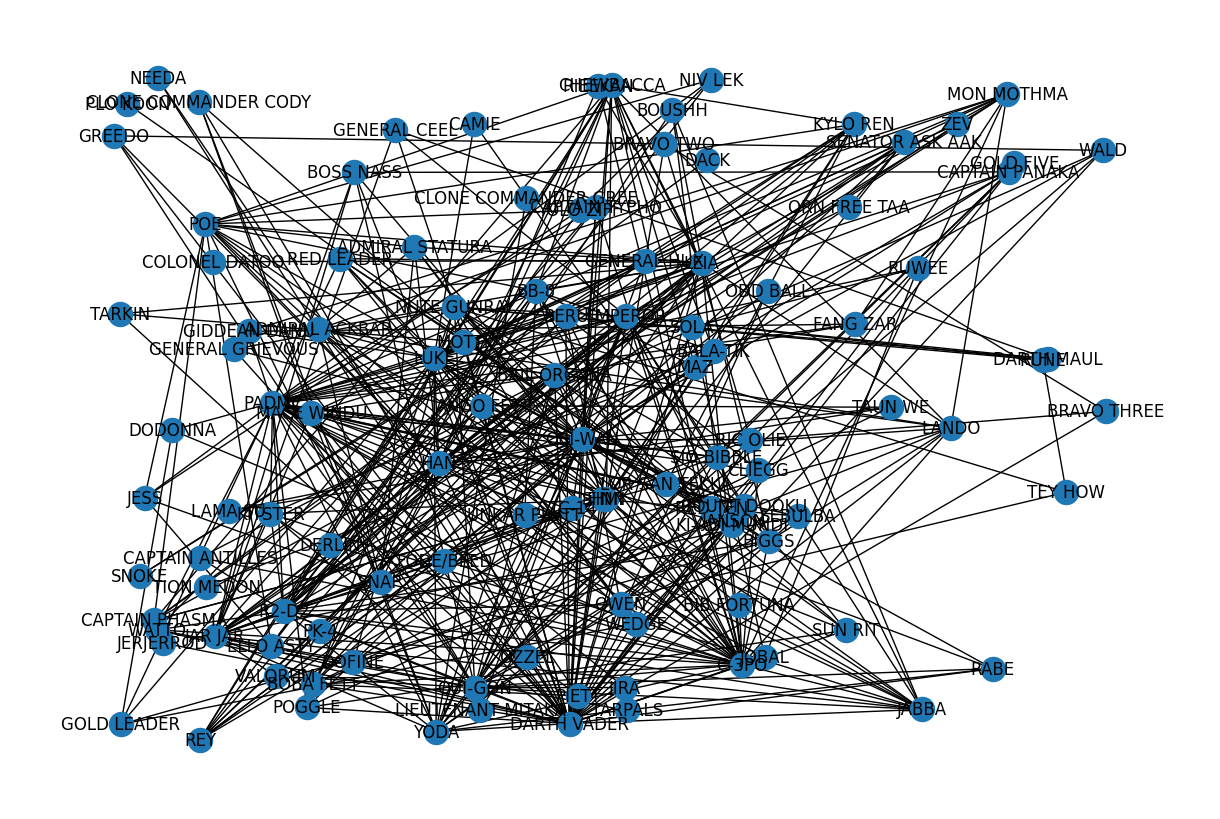

In [23]:
nodes = [x['name'] for x in raw['nodes']]
edges = [(nodes[x['source']],nodes[x['target']]) for x in raw['links']]
plt.figure(figsize=(12,8))
starwars = nx.Graph()
starwars.add_nodes_from(nodes)
starwars.add_edges_from(edges)
nx.draw_random(starwars, with_labels=True)

In [25]:
[k for k,v in nx.pagerank(starwars).items() if v>0.02]

['DARTH VADER',
 'R2-D2',
 'QUI-GON',
 'OBI-WAN',
 'EMPEROR',
 'JAR JAR',
 'PADME',
 'C-3PO',
 'LUKE',
 'LEIA',
 'HAN']

In [24]:
SW = pn.Network(notebook=True)
SW.from_nx(starwars)
SW.show('starwars.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# Huckleberry Finn

In [28]:
with requests.get('https://www.gutenberg.org/files/76/76-0.txt') as url:
    finn = url.content[9762:591195]

In [29]:
sentences = nltk.sent_tokenize(finn.decode('utf-8'))

In [30]:
edges = []
for sentence in sentences:
    tagged_sentence = nltk.pos_tag(nltk.word_tokenize(sentence))
    names = []
    for chunk in nltk.ne_chunk(tagged_sentence):
        if hasattr(chunk, 'label') and chunk.label()=='PERSON':
            name = ' '.join([c[0] for c in chunk])
            names.append(name.lower())
    if len(names)>1:
        tmp = list(set(names))
        edges.extend(list(itertools.combinations(tmp, 2)))

In [34]:
weights = Counter(edges)
source = []
target = []
weight = []
for (x,y),w in weights.items():
    if w>1:
        source.append(x)
        target.append(y)
        weight.append(w)

In [35]:
G = nx.from_pandas_edgelist(pd.DataFrame({'source': source, 'target': target, 'weight': weight}))

In [36]:
N = pn.Network(notebook=True)
N.from_nx(G)
N.show('huckleberry_finn.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [40]:
[k for k,v in nx.pagerank(G).items() if v>0.025]

['jim', 'tom', 'robinson', 'aunt sally', 'uncle silas']

# American Football

The data is taken from [here](http://www-personal.umich.edu/~mejn/netdata/)

In [41]:
with requests.get('http://www-personal.umich.edu/~mejn/netdata/football.zip') as url:
    zf = ZipFile(BytesIO(url.content))

In [42]:
football = nx.read_gml(zf.open('football.gml'))
FB = pn.Network(notebook=True)
FB.from_nx(football)
FB.show('football.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [43]:
[k for k,v in nx.centrality.edge_betweenness_centrality(football).items() if v>0.012]

[('BrighamYoung', 'Syracuse'),
 ('KansasState', 'BallState'),
 ('Wyoming', 'CentralMichigan'),
 ('Alabama', 'UCLA'),
 ('BoiseState', 'CentralMichigan'),
 ('Washington', 'MiamiFlorida'),
 ('Ohio', 'IowaState'),
 ('Tulsa', 'NorthCarolina'),
 ('Missouri', 'Clemson')]

# London Public Transportation map

The data is taken from [here](https://manliodedomenico.com/data.php)

In [44]:
with requests.get('https://manliodedomenico.com/data/London_Multiplex_Transport.zip') as url:
    zf = ZipFile(BytesIO(url.content))

In [45]:
nodes = pd.read_csv(zf.open('London_Multiplex_Transport/Dataset/london_transport_nodes.txt'),sep=' ')
nodes

nodeID          nodeLabel    nodeLat  nodeLong
0         0          abbeyroad  51.531952  0.003738
1         1            westham  51.528526  0.005332
2         2       actoncentral  51.508758 -0.263416
3         3  willesdenjunction  51.532234 -0.243895
4         4          actontown  51.503071 -0.280288
..      ...                ...        ...       ...
364     364    watfordjunction  51.663883 -0.396158
365     365       westfinchley  51.609263 -0.188903
366     366        westruislip  51.569588 -0.437846
367     367          wimbledon  51.421108 -0.206648
368     368      wimbledonpark  51.434581 -0.199172

[369 rows x 4 columns]

In [46]:
edges = pd.read_csv(zf.open('London_Multiplex_Transport/Dataset/london_transport_multiplex.edges'),sep=' ',header=None)
del edges[0],edges[3]
edges.rename(columns={1: 'source', 2: 'target'}, inplace=True)
edges

source  target
0         1      77
1         1     106
2         1     219
3         1     321
4         3     224
..      ...     ...
436     269     270
437     269     291
438     289     290
439     290     324
440     291     323

[441 rows x 2 columns]

In [47]:
london = nx.from_pandas_edgelist(edges)
plt.figure(figsize=(18,18),dpi=400)
nx.draw_kamada_kawai(london,labels = {id: lab for i,(id,lab) in nodes[['nodeID','nodeLabel']].iterrows()})

In [48]:
L = pn.Network(notebook=True)
L.from_nx(london)
L.show('london.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [53]:
[nodes.iloc[k,1] for k,v in nx.pagerank(london).items() if v>0.005]

['westham',
 'canningtown',
 'stratford',
 'willesdenjunction',
 'bank',
 'kingscrossstpancras',
 'bakerstreet',
 'paddington',
 'earlscourt']

# NBA Season 2018-2019

The data is taken from [here](https://sports-statistics.com/database/basketball-data/nba/)

In [54]:
data = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
data

Unnamed: 0  EVENTMSGACTIONTYPE  EVENTMSGTYPE  EVENTNUM   GAME_ID  \
0                0                   0            12         2  21800794   
1                1                   0            10         4  21800794   
2                2                   1             5         7  21800794   
3                3                   6             1         9  21800794   
4                4                   2             6        10  21800794   
...            ...                 ...           ...       ...       ...   
582463         431                   1             9       634  21801037   
582464         432                   0             8       635  21801037   
582465         433                  63             2       638  21801037   
582466         434                   0             4       639  21801037   
582467         435                   0            13       640  21801037   

                                 HOMEDESCRIPTION  NEUTRALDESCRIPTION  \
0                                            NaN                 NaN   
1       Jump Ball Ayton vs. Faried: Tip to Okobo                 NaN   
2              Jackson Bad Pass Turnover (P1.T1)                 NaN   
3                                            NaN                 NaN   
4               Bridges S.FOUL (P1.T1) (E.Dalen)                 NaN   
...                                          ...                 ...   
582463                                       NaN                 NaN   
582464                                       NaN                 NaN   
582465                                       NaN                 NaN   
582466              Kleber REBOUND (Off:5 Def:7)                 NaN   
582467                                       NaN                 NaN   

       PCTIMESTRING  PERIOD  PERSON1TYPE  ...  PLAYER3_ID  PLAYER3_NAME  \
0             12:00       1          0.0  ...           0           NaN   
1             12:00       1          4.0  ...     1629059    Elie Okobo   
2             11:39       1          4.0  ...           0           NaN   
3             11:31       1          5.0  ...           0           NaN   
4             11:31       1          4.0  ...           0           NaN   
...             ...     ...          ...  ...         ...           ...   
582463         0:04       4          3.0  ...           0           NaN   
582464         0:04       4          5.0  ...           0           NaN   
582465         0:02       4          5.0  ...           0           NaN   
582466         0:02       4          4.0  ...           0           NaN   
582467         0:00       4          0.0  ...           0           NaN   

        PLAYER3_TEAM_ABBREVIATION PLAYER3_TEAM_CITY PLAYER3_TEAM_ID  \
0                             NaN               NaN             NaN   
1                             PHX           Phoenix    1.610613e+09   
2                             NaN               NaN             NaN   
3                             NaN               NaN             NaN   
4                             NaN               NaN             NaN   
...                           ...               ...             ...   
582463                        NaN               NaN             NaN   
582464                        NaN               NaN             NaN   
582465                        NaN               NaN             NaN   
582466                        NaN               NaN             NaN   
582467                        NaN               NaN             NaN   

       PLAYER3_TEAM_NICKNAME      SCORE SCOREMARGIN  \
0                        NaN        NaN         NaN   
1                       Suns        NaN         NaN   
2                        NaN        NaN         NaN   
3                        NaN      2 - 0          -2   
4                        NaN        NaN         NaN   
...                      ...        ...         ...   
582463                   NaN        NaN         NaN   
582464                   NaN        

In [56]:
teams = pd.crosstab(data.PLAYER1_TEAM_ABBREVIATION,data.PLAYER2_TEAM_ABBREVIATION)
for x in teams.columns:
    teams.loc[x,x]=0 
teams

PLAYER2_TEAM_ABBREVIATION  ATL  BKN  BOS  CHA  CHI  CLE  DAL  DEN  DET  GSW  \
PLAYER1_TEAM_ABBREVIATION                                                     
ATL                          0  114  142  132  129  102   80   70   99   58   
BKN                         99    0  118  119  100  108   69   59   97   63   
BOS                        132  112    0  111   60  103   59   49  122   62   
CHA                        111  111  102    0   76   84   55   57  104   39   
CHI                        137  118   85   84    0  107   75   59   97   57   
CLE                         94  124  114  106   97    0   48   53  105   39   
DAL                         58   57   53   41   56   59    0   82   58  100   
DEN                         57   71   55   63   43   61   95    0   52  106   
DET                        100   96  125  111  108  129   62   56    0   44   
GSW                         65   54   63   59   72   56  123  146   61    0   
HOU                         48   55   62   53   68   63  123  122   72  109   
IND                        130   83   96   81   97   83   63   49  110   52   
LAC                         62   63   75   63   59   62  121  134   62  148   
LAL                         68   60   49   51   50   51  103   83   58   99   
MEM                         66   62   59   63   52   54  120   98   68  105   
MIA                        129  113  110  126   88   99   57   45  117   68   
MIL                        122  114   95  110  109   96   54   51  101   58   
MIN                         64   50   56   51   52   50   93  102   59  103   
NOP                         59   54   64   76   54   60  127  132   51   92   
NYK                        123  111  128   80   90   82   51   49  114   51   
OKC                         67   58   62   55   73   50  122  125   69   87   
ORL                        119   74   72   99   96   69   50   60  108   51   
PHI                        121  126  106  137   85   81   52   46  132   73   
PHX                         67   64   64   67   60   57  134  134   70  133   
POR                         49   61   46   54   47   46  127  121   51  104   
SAC                         67   67   66   62   54   40   81   87   63  115   
SAS                         62   46   46   53   53   53  103   91   38   78   
TOR                         93   97  109   82  112  120   61   55   97   53   
UTA                         66   68   67   59   51   57  127  120   62   93   
WAS                        128  129   91  109  118  108   62   52   82   58   

PLAYER2_TEAM_ABBREVIATION  ...  OKC  ORL  PHI  PHX  POR  SAC  SAS  TOR  UTA  \
PLAYER1_TEAM_ABBREVIATION  ...                                                
ATL                        ...   69  133  130   67   64   70   48  100   68   
BKN                        ...   60   76  137   52   67   57   52  130   58   
BOS                        ...   69   75  117   54   53   60   39  129   61   
CHA                        ...   66   93  133   63   51   48   42   67   50   
CHI                        ...   85  106  107   56   48   63   43  110   49   
CLE                        ...   65   79   77   62   45   49   55  122   53   
DAL                        ...  137   45   55  122  114   85  116   64  129   
DEN                        ...  132   51   56  128  111   88  115   46  136   
DET                        ...   63  100  141   58   54   58   47   89   68   
GSW                        ...  100   47   61  135  114  128   74   58   87   
HOU                        ...  136   57   63   85   82  101  101   51  145   
IND                        ...   53   96  117   47   53   64   52   90   52   
LAC                        ...  140   58   72  142  101  125  121   59  106   
LAL                        ...  109   51   68  121  123  118  129   64  125   
MEM                        ...  101   60   59   81  118  137  126   62  123   
MIA                        ...   57  120   99   53   50   62   49  115   53   
MIL                        ...   49   70   87   6

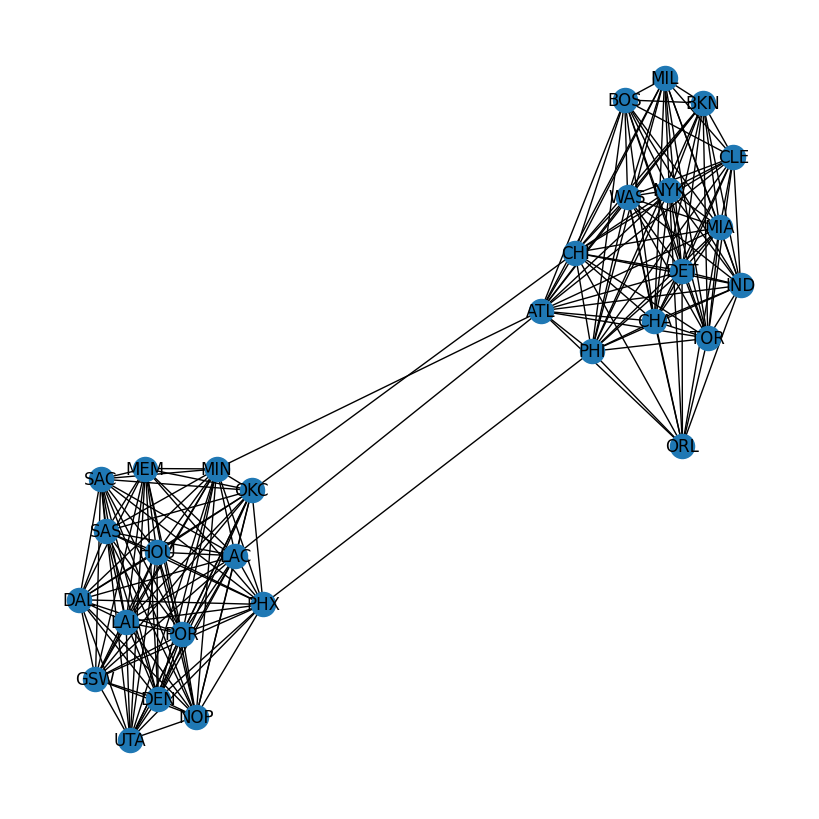

In [57]:
graphTeams = nx.from_pandas_adjacency(np.round(teams/160,0))
plt.figure(figsize=(8,8))
nx.draw_spring(graphTeams, with_labels=True)

In [68]:
[k for k,v in nx.pagerank(graphTeams).items() if v>0.035]

['ATL', 'CHI', 'LAC', 'MIN', 'OKC', 'PHI', 'PHX']

In [70]:
[k for k,v in nx.centrality.edge_betweenness_centrality(graphTeams).items() if v>0.03]

[('ATL', 'LAC'), ('ATL', 'MIN'), ('CHI', 'OKC'), ('PHI', 'PHX')]

In [58]:
J = pn.Network(notebook=True)
J.from_nx(graphTeams)
J.show_buttons(filter_=['physics'])
J.show('nba_teams.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [59]:
players = pd.crosstab(data.PLAYER1_NAME,data.PLAYER2_NAME)
players

PLAYER2_NAME     Aaron Gordon  Aaron Holiday  Abdel Nader  Al Horford  \
PLAYER1_NAME                                                            
Aaron Gordon                0              0            0           2   
Aaron Holiday               0              0            0           0   
Abdel Nader                 1              0            0           0   
Al Horford                  0              0            0           0   
Al-Farouq Aminu             1              0            0           0   
...                       ...            ...          ...         ...   
Zach LaVine                 0              0            0           0   
Zach Lofton                 0              0            0           0   
Zaza Pachulia               0              1            0           0   
Zhaire Smith                0              0            0           0   
Zhou Qi                     0              0            0           0   

PLAYER2_NAME     Al-Farouq Aminu  Alan Williams  Alec Burks  Alex Abrines  \
PLAYER1_NAME                                                                
Aaron Gordon                   1              0           0             0   
Aaron Holiday                  0              0           0             0   
Abdel Nader                    0              0           1             0   
Al Horford                     1              0           1             0   
Al-Farouq Aminu                0              0           0             0   
...                          ...            ...         ...           ...   
Zach LaVine                    1              0           2             0   
Zach Lofton                    0              0           0             0   
Zaza Pachulia                  0              0           0             1   
Zhaire Smith                   0              0           0             0   
Zhou Qi                        0              0           0             0   

PLAYER2_NAME     Alex Caruso  Alex Len  ...  Wilson Chandler  Yante Maten  \
PLAYER1_NAME                            ...                                 
Aaron Gordon               0         2  ...                0            0   
Aaron Holiday              0         0  ...                0            0   
Abdel Nader                0         0  ...                0            0   
Al Horford                 0         0  ...                0            0   
Al-Farouq Aminu            0         0  ...                0            0   
...                      ...       ...  ...              ...          ...   
Zach LaVine                0         3  ...                0            0   
Zach Lofton                0         0  ...                0            0   
Zaza Pachulia              2         0  ...                0            0   
Zhaire Smith               0         0  ...                0            0   
Zhou Qi                    0         0  ...                0            0   

PLAYER2_NAME     Yogi Ferrell  Yuta Watanabe  Zach Collins  Zach LaVine  \
PLAYER1_NAME                                                              
Aaron Gordon                0              0             1            1   
Aaron Holiday               0              0             0            0   
Abdel Nader                 1              0             2            0   
Al Horford                  0              0             0            0   
Al-Farouq Aminu             0              0            64            0   
...                       ...            ...           ...          ...   
Zach LaVine                 0              0             0            0   
Zach Lofton                 0              0             0            0   
Zaza Pachulia               0              0             2            1   
Zhaire Smith                0              0             0            0   
Zhou Qi                     0              0             0            0   

PLAYER2_NAME     Zach Lofton  Zaza Pachulia  Zhaire Smith  Zhou Qi  
P

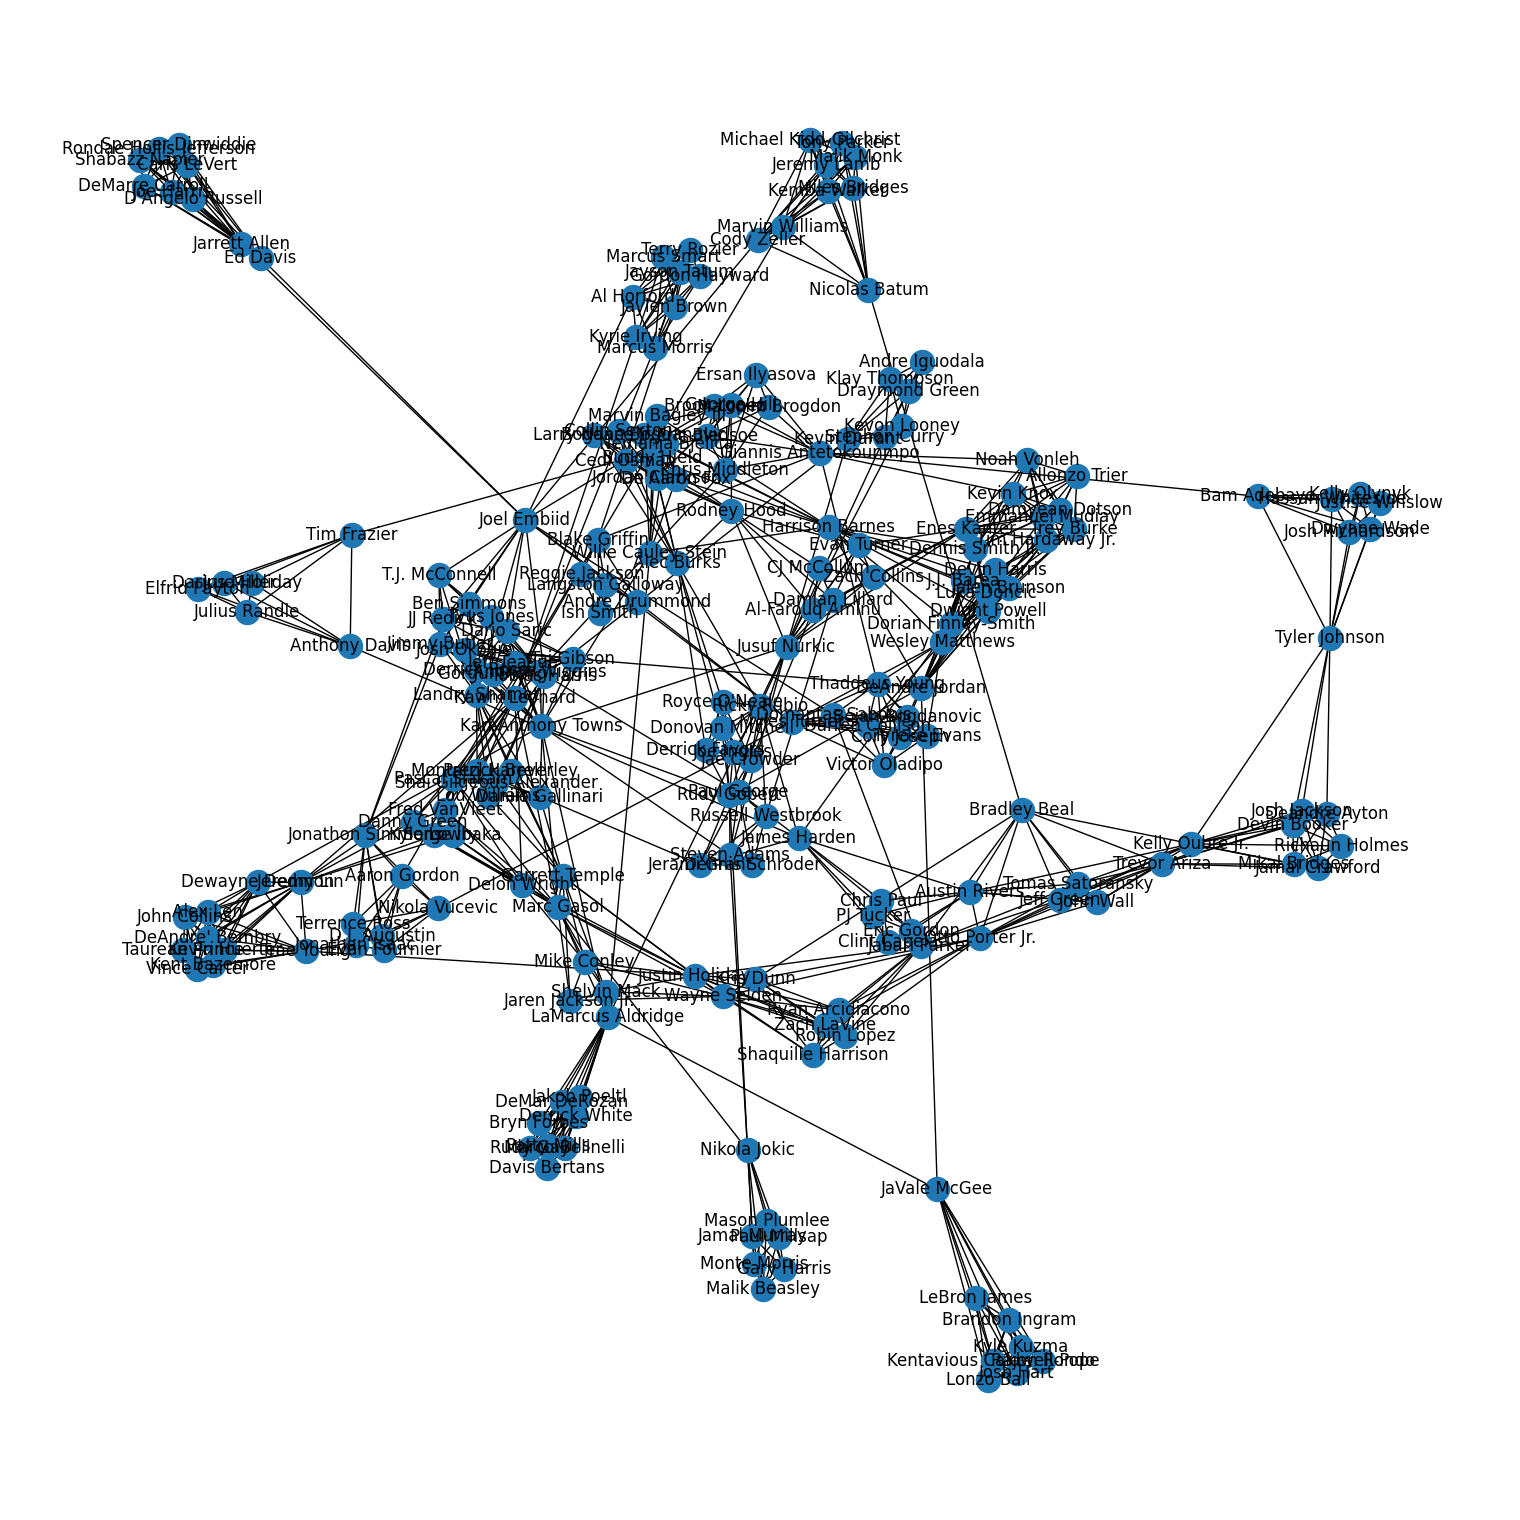

In [60]:
sel = players.sum(axis=0)>400

graphPlayers = nx.from_pandas_adjacency(np.round(players.loc[sel,sel]/16,0))
plt.figure(figsize=(15,15))
nx.draw_spring(graphPlayers,with_labels=True)

In [87]:
[k for k,v in nx.pagerank(graphPlayers).items() if v>0.006]

['Alec Burks',
 'Austin Rivers',
 'Dario Saric',
 'DeAndre Jordan',
 'Garrett Temple',
 'George Hill',
 'Giannis Antetokounmpo',
 'Harrison Barnes',
 'James Harden',
 'Jeremy Lin',
 'Joel Embiid',
 'Jusuf Nurkic',
 'Karl-Anthony Towns',
 'Kelly Oubre Jr.',
 'LaMarcus Aldridge',
 'Marc Gasol',
 'Otto Porter Jr.',
 'Ricky Rubio',
 'Rodney Hood',
 'Rudy Gobert',
 'Tobias Harris',
 'Tyler Johnson',
 'Wesley Matthews']

In [96]:
[k for k,v in nx.centrality.edge_betweenness_centrality(graphPlayers).items() if v > 0.035]

[('Austin Rivers', 'James Harden'),
 ('Bam Adebayo', 'Giannis Antetokounmpo'),
 ('Blake Griffin', 'Giannis Antetokounmpo'),
 ('Brook Lopez', 'Joel Embiid'),
 ('Cody Zeller', 'Joel Embiid'),
 ('Dario Saric', 'Joel Embiid'),
 ('DeAndre Jordan', 'JaVale McGee'),
 ('Dewayne Dedmon', 'Karl-Anthony Towns'),
 ('Dorian Finney-Smith', 'James Harden'),
 ('Ed Davis', 'Joel Embiid'),
 ('JaVale McGee', 'LaMarcus Aldridge'),
 ('Jarrett Allen', 'Joel Embiid'),
 ('Jimmy Butler', 'Karl-Anthony Towns'),
 ('Karl-Anthony Towns', 'Marc Gasol'),
 ('LaMarcus Aldridge', 'Marc Gasol'),
 ('Marc Gasol', 'Nikola Jokic'),
 ('Marc Gasol', 'Wayne Selden')]

In [71]:
sel = players.sum(axis=0)>400
graphPlayers = nx.from_pandas_adjacency(np.round(players.loc[sel,sel]/16,0))
I = pn.Network(height=800,notebook=True)
I.from_nx(graphPlayers)
I.show('nba_players.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [97]:
[k for k,v in nx.centrality.betweenness_centrality(graphPlayers).items() if v > 0.1]

['Giannis Antetokounmpo',
 'James Harden',
 'Joel Embiid',
 'Karl-Anthony Towns',
 'LaMarcus Aldridge',
 'Marc Gasol']

# Top 500 Songs

The data is taken from [here](https://www.kaggle.com/datasets/omarhanyy/500-greatest-songs-of-all-time)

In [99]:
music = pd.read_csv('/home/kaygun/local/data/top_500_songs.csv', encoding='latin-1')
music

title  \
0              Like a Rolling Stone   
1    (I Can't Get No) Satisfaction'   
2                           Imagine   
3                   What's Going On   
4                           Respect   
..                              ...   
495                          Heroin   
496              Leader of the Pack   
497                   Pressure Drop   
498                 Come As You Are   
499                  I Got You Babe   

                                           description  \
0    "I wrote it. I didn't fail. It was straight," ...   
1    "It's the riff heard round the world," says St...   
2    John Lennon wrote "Imagine," his greatest musi...   
3    "What's Going On" is an exquisite plea for pea...   
4    Otis Redding wrote "Respect" and recorded it f...   
..                                                 ...   
495  This seven-minute, two-chord track spiked out ...   
496  Morton found the inspiration for this song at ...   
497  Toots and the Maytals were already reggae star...   
498  "It's just about people and what they're expec...   
499  Late one night, while Sonny and Cher were livi...   

                                            appears on  \
0                      Highway 61 Revisited (Columbia)   
1                             Out of Our Heads (ABKCO)   
2                              Imagine (Capitol/Apple)   
3                              What's Going On (Tamla)   
4    I Never Loved a Man the Way I Love You (Atlantic)   
..                                                 ...   
495          The Velvet Underground and Nico (Polydor)   
496  Myrmidons of Melodrama: Definitive Collection ...   
497                       The Harder They Come (Hip-O)   
498                                 Nevermind (Geffen)   
499  The Beat Goes On: The Best of Sonny and Cher (...   

                     artist  \
0                 Bob Dylan   
1        The Rolling Stones   
2               John Lennon   
3               Marvin Gaye   
4           Aretha Franklin   
..                      ...   
495  The Velvet Underground   
496         The Shangri-Las   
497   Toots and the Maytals   
498                 Nirvana   
499          Sonny and Cher   

                                               writers  \
0                                                Dylan   
1                          Mick Jagger, Keith Richards   
2                                          John Lennon   
3                   Gaye, Renaldo Benson, Al Cleveland   
4                                         Otis Redding   
..                                                 ...   
495                                           Lou Reed   
496  George "Shadow" Morton, Jeff Barry, Ellie Gree...   
497                                      Toots Hibbert   
498                               Kurt Cobain, Nirvana   
499                                         Sonny Bono   

                           producer       released         streak position  
0                       Tom Wilson      July, 1965       12 weeks    No. 2  
1                Andrew Loog Oldham      May, 1965       14 weeks    No. 1  
2    Lennon, Phil Spector, Yoko Ono  October, 1971        9 weeks    No. 3  
3                             Gaye       Feb, 1971       13 weeks    No. 2  
4                      Jerry Wexler    April, 1967       12 weeks    No. 1  
..                              ...            ...            ...      ...  
495         Andy Warhol, Tom Wilson   March , 1967     Non-Single      NaN  
496        Morton, Barry, Greenwich    Oct. , 1964       12 weeks    No. 1  
497                     Leslie Kong    Feb. , 1973  Did Not Chart      NaN  
498              Butch Vig, Nirvana   Sept. , 1991       18 weeks   No. 32  
499                            Bono    July , 1965       14 weeks    No. 1  

[500 rows x 9 columns]

In [100]:
producers = []
for x in music['producer']:
    producers.extend([y.strip() for y in x.split(',')])

producers = list(set(producers))
artists = list(set(music['artist']))
    
d = pd.DataFrame(0, index=artists, columns=producers)

for i,(a,ps) in music[['artist','producer']].iterrows():
    for p in ps.split(','):
        d.loc[a,p.strip()] += 1
        
d.fillna(0,inplace=True)
r = np.matmul(d,d.T)
r.columns = d.index
for x in d.index:
    r.loc[x,x]=0

plt.figure(figsize=(12,12))
musicians = nx.from_pandas_adjacency(r)
A = pn.Network(notebook=True)
A.from_nx(musicians)
A.show('musicians.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


/tmp/ipykernel_43863/4275347339.py:15: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  r = np.matmul(d,d.T)


<Figure size 1200x1200 with 0 Axes>

In [101]:
writers = []
for x in music['writers']:
    writers.extend([y.strip() for y in x.split(',')])

writers = list(set(writers))
artists = list(set(music['artist']))
    
d = pd.DataFrame(0, index=artists, columns=writers)

for i,(a,ps) in music[['artist','writers']].iterrows():
    for p in ps.split(','):
        d.loc[a,p.strip()] += 1
        
d.fillna(0,inplace=True)
r = np.matmul(d,d.T)
r.columns = d.index
for x in d.index:
    r.loc[x,x]=0

plt.figure(figsize=(12,12))
musicians = nx.from_pandas_adjacency(r)
A = pn.Network(notebook=True)
A.from_nx(musicians)
A.show('musicians.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


/tmp/ipykernel_43863/2017227182.py:15: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  r = np.matmul(d,d.T)


<Figure size 1200x1200 with 0 Axes>

In [102]:
edges = []
nodes = []

for x in music['writers']:
    tmp = [y.strip() for y in x.split(',')]
    nodes.extend(tmp)
    if len(tmp)>1:
        edges.extend(list(itertools.combinations(tmp,2)))
        
A = pn.Network(notebook=True)
A.add_nodes(nodes)
A.add_edges(edges)
A.show('writers.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [138]:
edges = []
nodes = []

for x in music['producer']:
    tmp = [y.strip() for y in x.split(',')]
    nodes.extend(tmp)
    if len(tmp)>1:
        edges.extend(list(itertools.combinations(tmp,2)))
        
A = pn.Network(notebook=True)
A.add_nodes(nodes)
A.add_edges(edges)
A.show('producers.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# Corporate Ownership Network

Data is taken from [here](https://math.nist.gov/~RPozo/complex_datasets.html)

In [103]:
with requests.get('http://vlado.fmf.uni-lj.si/pub/networks/data/econ/Eva/EVA.zip') as url:
    zf = ZipFile(BytesIO(url.content))
    corps = zf.open('eva.net').read().decode('latin-1')
    names = zf.open('names.txt').read().decode('latin-1')

In [104]:
edges = []
nodes = {}
raw = corps.split('\n')
for x in raw:
    if x.startswith('*ver'):
        flag = True
        continue
    elif x.startswith('*arc'):
        flag = False
        continue 
    if flag:
        tmp = x.split('"')
        if len(tmp)>1:
            s = int(tmp[0].strip())
            t = tmp[1].strip()
            nodes.update({s: t})
    else:
        tmp = re.sub(r'[\s]+',' ',x).split()
        if len(tmp)>1:
            s = int(tmp[0].strip())
            t = int(tmp[1].strip())
            edges.append((s,t))

In [107]:
corpGraph = nx.from_edgelist(edges)
[nodes.get(k) for k,v in nx.centrality.degree_centrality(corpGraph).items() if v>0.02]

['News',
 'CNHI',
 'Clear Channel Communications',
 'Lee Enterprises',
 'Liberty Group Publishing',
 'CBS RADIO - Infinity Broadcasting']

In [106]:
CG = pn.Network(notebook=True)
CG.from_nx(corpGraph)
CG.show('corporate.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
